In [ ]:
#Github Link


In [108]:
import numpy as np
import pandas as pd

In [109]:
# Q.1 Load in the appropriate csv file as a pandas dataframe
bt = pd.read_csv('batting.csv')

In [232]:
# Q.2 Print out the dimensions and info about the dataframe you just created
bt.columns

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'age'],
      dtype='object')

In [112]:
# Q.3 How many players have hit 40 or more HRs in one single season? (Number only)
singleSeason_HR = bt.groupby(['yearID','playerID','nameFirst','nameLast'])['HR'].sum().reset_index()
singleSeason_HR_40Plus = singleSeason_HR[singleSeason_HR['HR']>=40]['playerID'].nunique()
singleSeason_HR_40Plus

142

In [113]:
# Q.4 How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)
career_HR = bt.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
career_HR_600Plus = career_HR[career_HR>=600].reset_index()
career_HR_600Plus[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


In [114]:
# Q.5 How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)
singleSeason = bt.groupby(['yearID','playerID','nameFirst','nameLast'])['2B','3B','H','HR'].sum().reset_index()
singleSeason_40Plus2B_10Plus3B_200PlusH_30PlusHR = singleSeason[(singleSeason['2B']>=40) & (singleSeason['3B']>=10) & (singleSeason['H']>=200) & (singleSeason['HR']>=30)]['playerID'].nunique()
singleSeason_40Plus2B_10Plus3B_200PlusH_30PlusHR

11

In [234]:
# Q.6 How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )
singleSeason = bt.groupby(['playerID','nameFirst','nameLast','yearID'])['SB'].sum().reset_index()
singleSeason_100PlusSB = singleSeason[singleSeason['SB'] >= 100][['nameFirst','nameLast','yearID','SB']]
singleSeason_100PlusSB.sort_values(by='SB',ascending = False)

,nameFirst,nameLast,yearID,SB
62362,Hugh,Nicol,1887,138.0
37059,Rickey,Henderson,1982,130.0
48268,Arlie,Latham,1887,129.0
9713,Lou,Brock,1974,118.0
16703,Charlie,Comiskey,1887,117.0
34649,Billy,Hamilton,1889,111.0
89859,John,Ward,1887,111.0
34651,Billy,Hamilton,1891,111.0
16351,Vince,Coleman,1985,110.0
16353,Vince,Coleman,1987,109.0


In [116]:
# Q.7 How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)
bt_1960s = bt[(bt['yearID']>=1960) & (bt['yearID'] < 1970)]
bt_1960s_HR = bt_1960s.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
bt_1960s_HR_200Plus = bt_1960s_HR[bt_1960s_HR>=200].reset_index()
bt_1960s_HR_200Plus_ordered = bt_1960s_HR_200Plus[['nameFirst','nameLast','HR']].sort_values(by='HR',ascending = False)
bt_1960s_HR_200Plus_ordered

,nameFirst,nameLast,HR
8,Harmon,Killebrew,393
0,Hank,Aaron,375
12,Willie,Mays,350
15,Frank,Robinson,316
13,Willie,McCovey,300
6,Frank,Howard,288
3,Norm,Cash,278
2,Ernie,Banks,269
9,Mickey,Mantle,256
4,Orlando,Cepeda,254


In [117]:
# Q.8 Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)
career_HR = bt.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().reset_index()
HR_mostInHistory = career_HR[['nameFirst','nameLast','HR']].sort_values('HR',ascending = False).head(1)
HR_mostInHistory

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


In [118]:
# Q.9 Who had the most hits (H) in the 1970s? (Dataframe)
bt_1970s = bt[(bt['yearID']>=1970) & (bt['yearID'] < 1980)]
HR_1970s = bt_1970s.groupby(['playerID','nameFirst','nameLast'])['H'].sum().reset_index()
HR_1970s_most = HR_1970s[['nameFirst','nameLast','H']].sort_values('H',ascending = False).head(1)
HR_1970s_most

,nameFirst,nameLast,H
1639,Pete,Rose,2045


In [166]:
# Q.10 Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)
# btc : stints combined data of batting.csv
btc = bt.groupby(['yearID','playerID','nameFirst','nameLast'])['AB','IBB','HBP','SH','SF','H'].sum().reset_index()
btc['PA'] = btc['AB']+btc['IBB']+btc['HBP']+btc['SH']+btc['SF']
btc['OBP'] = (btc['H']+btc['IBB']+btc['HBP'])/(btc['AB']+btc['IBB']+btc['HBP']+btc['SF'])
OPB_500Plus_1977 = btc[(btc['yearID'] ==1977) &(btc['PA']>=500)]
OPB_500Plus_1977_top5 = OPB_500Plus_1977[['nameFirst','nameLast','OBP']].sort_values('OBP',ascending = False).head(5)
OPB_500Plus_1977_top5

,nameFirst,nameLast,OBP
50637,Rod,Carew,0.402191
51132,Dave,Parker,0.355522
51243,Ted,Simmons,0.349177
50589,Lyman,Bostock,0.343137
51247,Ken,Singleton,0.342908


In [243]:
# Q.11 Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)
# btc : stints combined data of batting.csv
btc['BA'] = btc['H']/btc['AB']
BA_PA300Plus_2013 = btc[(btc['yearID'] == 2013) & (btc['PA']>=300)]
BA_top8_PA300Plus_2013 = BA_PA300Plus_2013[['nameFirst','nameLast','BA']].sort_values('BA',ascending = False).head(8)
BA_top8_PA300Plus_2013

,nameFirst,nameLast,BA
90092,Miguel,Cabrera,0.347748
90905,Hanley,Ramirez,0.345395
90194,Michael,Cuddyer,0.331288
90684,Joe,Mauer,0.323596
91121,Mike,Trout,0.322581
90520,Chris,Johnson,0.321012
90323,Freddie,Freeman,0.319419
90887,Yasiel,Puig,0.319372


In [235]:
# Q.12 Leaders in hits from 1940 up to and including 1949 (Top 5) (Dataframe, first name, last name, number of hits)
bt_1940s = bt[(bt['yearID']>=1940) & (bt['yearID'] < 1950)]
bt_1940s_singlePlayerSum = bt_1940s.groupby(['playerID','nameFirst','nameLast'])['H'].sum().reset_index()
bt_1940s_singlePlayerTop5 = bt_1940s_singlePlayerSum[['nameFirst','nameLast','H']].sort_values('H',ascending = False).head(5)
bt_1940s_singlePlayerTop5

,nameFirst,nameLast,H
138,Lou,Boudreau,1578
427,Bob,Elliott,1563
1576,Dixie,Walker,1512
1103,Stan,Musial,1432
390,Bobby,Doerr,1407


In [327]:
# Q.13 Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)
Leader_in_hits = bt.groupby(['yearID','playerID','nameFirst','nameLast'])['H'].sum().reset_index()
Leader_in_hits = Leader_in_hits.sort_values(['yearID','H'],ascending=False).groupby('yearID').head(1)[['playerID','nameFirst','nameLast','H']]
Leader_in_hits_names = Leader_in_hits.groupby(['playerID','nameFirst','nameLast']).count().reset_index()
result = Leader_in_hits_names.sort_values(by = 'H', ascending = False).head(1)
result[['nameFirst','nameLast','H']]

,nameFirst,nameLast,H
21,Ty,Cobb,7


In [161]:
# Q.14 Which players have played the most games for their careers? Top 5 first name, last name, descending by games played presented as a dataframe
bt_partial = bt[['playerID','nameFirst','nameLast','G']]
singlePlayer_games_total = bt_partial.groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
singlePlayer_games_total_ordered = singlePlayer_games_total[['playerID','nameFirst','nameLast','G']].sort_values('G',ascending = False).head(5)
singlePlayer_games_total_ordered[['nameFirst','nameLast','G']]

,nameFirst,nameLast,G
14719,Pete,Rose,3562
18728,Carl,Yastrzemski,3308
1,Hank,Aaron,3298
7383,Rickey,Henderson,3081
3155,Ty,Cobb,3035


In [124]:
# Q.15 How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here
bt_H_HR = bt.groupby('playerID')[['H','HR']].sum()
H_3000Pluse_HR_500Plus = bt_H_HR[(bt_H_HR['H'] >= 3000) & (bt_H_HR['HR'] >= 500)]
H_3000Pluse_HR_500Plus

,H,HR
playerID,,
aaronha01,3771,755
mayswi01,3283,660
murraed02,3255,504
palmera01,3020,569
rodrial01,3115,696


In [125]:
# Q.16 How many HRs were hit during the entire 1988 season?  Just a number is okay here
bt_1988 = bt[bt['yearID'] == 1988]
bt_total_HR_1988 = bt_1988.groupby('yearID')['HR'].sum().reset_index()
bt_total_HR_1988

,yearID,HR
0,1988,3180


In [245]:
# Q.17 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average
btc_Wade_Boggs_AB_500Plus = btc[(btc['nameFirst'] == 'Wade') & (btc['nameLast'] == 'Boggs') & (btc['AB'] >= 500)]
btc_Wade_Boggs_AB_500Plus_ordered = btc_Wade_Boggs_AB_500Plus[['nameFirst','nameLast','BA']]
btc_Wade_Boggs_AB_500Plus_ordered.sort_values(by = 'BA', ascending = False).head(3)

,nameFirst,nameLast,BA
57921,Wade,Boggs,0.367534
60800,Wade,Boggs,0.366438
59818,Wade,Boggs,0.362976


In [242]:
# Q.18 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP
bt_1995_PA_400Plus = btc[(btc['yearID'] == 1995) & (btc['PA'] >= 400)]
bt_1995_PA_400Plus.sort_values(by = 'OBP', ascending = False)[['nameFirst','nameLast','OBP']].head(10)

,nameFirst,nameLast,OBP
68474,Edgar,Martinez,0.385609
68243,Tony,Gwynn,0.376812
68653,Mike,Piazza,0.360987
68398,Chuck,Knoblauch,0.346570
68848,Frank,Thomas,0.346296
67937,Dante,Bichette,0.346218
67915,Derek,Bell,0.344017
67955,Bobby,Bonilla,0.340351
68909,Larry,Walker,0.338403
68740,Tim,Salmon,0.336976


In [305]:
# Q.19 Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs
bt_partial_years = bt[(bt['yearID'] == 1922) | (bt['yearID'] == 1925) | (bt['yearID'] == 1926) | (bt['yearID'] == 1928)]
bt_partial_years.sort_values(['yearID','3B'],ascending=False).groupby('yearID').head(1)[['nameFirst','nameLast','yearID','3B']]


,nameFirst,nameLast,yearID,3B
22483,Earle,Combs,1928,21
21808,Paul,Waner,1926,22
20863,Kiki,Cuyler,1925,26
19262,Jake,Daubert,1922,22


In [296]:
# Q.20 How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here
H_HR_SB_singleSeason_special = bt.groupby(['playerID','yearID'])['HR','SB'].sum()
H_HR_SB_singleSeason_special_1 = H_HR_SB_singleSeason_special[(H_HR_SB_singleSeason_special['HR'] >= 30)]
H_HR_SB_singleSeason_special_2 = H_HR_SB_singleSeason_special_1[H_HR_SB_singleSeason_special_1['SB'] >= 30]
H_HR_SB_singleSeason_special_2.reset_index()['playerID'].nunique()


38

In [130]:
# Q.21 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)
bt_1986_AB_400Plus = btc[(btc['yearID'] == 1986) & (btc['AB'] >= 400)]
bt_1986_AB_400Plus.sort_values(by = 'OBP', ascending = False)[['nameFirst','nameLast','OBP']].head(1)

,nameFirst,nameLast,OBP
58869,Wade,Boggs,0.369565


In [175]:
# Q.22 Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)
#selecting data of League 'NL' in 1997
bt2 = bt[(bt['lgID'] =='NL') & (bt['yearID'] == 1997)]
#calcaulating OBP for bt2
btc2 = bt2.groupby(['yearID','playerID','nameFirst','nameLast'])['AB','IBB','HBP','SH','SF','H'].sum().reset_index()
btc2['PA'] = btc2['AB']+btc2['IBB']+btc2['HBP']+btc2['SH']+btc2['SF']
btc2['OBP'] = (btc2['H']+btc2['IBB']+btc2['HBP'])/(btc2['AB']+btc2['IBB']+btc2['HBP']+btc2['SF'])
bt_1997_AB_400Plus_NL = btc2[(btc2['AB'] >= 400)]
bt_1997_AB_400Plus_NL = bt_1997_AB_400Plus_NL.sort_values(by = 'OBP', ascending = False)
bt_1997_AB_400Plus_NL[['nameFirst','nameLast','OBP']].head(1)

,nameFirst,nameLast,OBP
560,Larry,Walker,0.393333


In [178]:
# Q.23 Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)
btc_partial = btc[(btc['yearID'] == 2012) & (btc['AB'] >= 500)]
mean = btc_partial.groupby('yearID')['AB'].mean()
mean
#mean.dtype
btc_partial[btc_partial['AB'] > 566.834783][['nameFirst','nameLast','OBP']].sort_values(by = 'OBP', ascending = False)

,nameFirst,nameLast,OBP
89010,Prince,Fielder,0.348315
88797,Miguel,Cabrera,0.347222
88760,Ryan,Braun,0.344992
89404,Andrew,McCutchen,0.344156
88723,Adrian,Beltre,0.330671
88806,Robinson,Cano,0.329721
88789,Billy,Butler,0.328076
89908,David,Wright,0.325620
89231,Derek,Jeter,0.321739
89608,Aramis,Ramirez,0.315789


In [211]:
# Q.24 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)
youngest = bt.groupby(['playerID','nameFirst','nameLast','yearID','birthYear'])['HR'].sum().reset_index()
youngest = youngest[bt_HR_total['HR'] >=50]
youngest['Age'] = youngest['yearID'] - youngest['birthYear']
result = youngest.sort_values(by= 'Age' , ascending = True).head(1)
result[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
26282,Prince,Fielder,50,2007


In [226]:
# Q.25 Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)
HR_total = bt.groupby(['playerID','nameFirst','nameLast','yearID']).sum()
singlePlayer = HR_total.groupby(level ='yearID').cumsum().reset_index()
singlePlayer_300Plus = singlePlayer[singlePlayer['HR'] >= 300].reset_index(drop = True)[['playerID','nameFirst','nameLast','yearID','HR']]
bt['age'] = bt['yearID'] - bt['birthYear']
playAge = bt[['playerID','yearID','age']]
result = pd.merge(singlePlayer_300Plus,playAge, on=['playerID','yearID'])
result.sort_values(by = 'age', ascending = True).head(5)[['nameFirst','nameLast','yearID']]

,nameFirst,nameLast,yearID
59626,Carl,Scheib,1943
46340,Joe,Nuxhall,1944
64749,Joe,Stanley,1897
73825,Lefty,Weinert,1919
59627,Carl,Scheib,1944


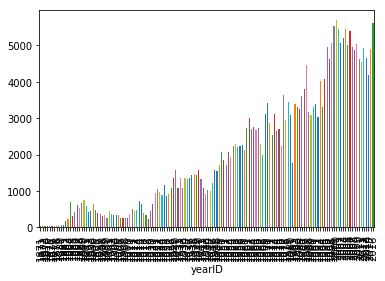

In [252]:
# Bonus1 Graph total HRs per season using bar graph
HR_total = bt.groupby(['yearID'])['HR'].sum()
HR_total.plot.bar (x='yearID',y='HR')

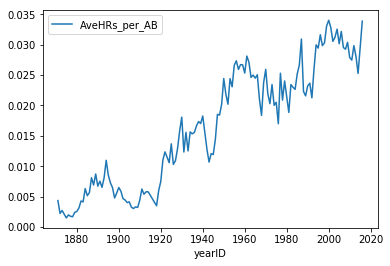

In [258]:
# Bonus2 Using a line graph please graph the average HRs per AB (think about this) per season
HR_AB_per_season = bt.groupby('yearID')['HR','AB'].sum().reset_index()
HR_AB_per_season['AveHRs_per_AB']=HR_AB_per_season['HR']/HR_AB_per_season['AB']
HR_AB_per_season.plot.line(x='yearID',y='AveHRs_per_AB')
